In [1]:
import os
import pandas as pd
import nltk
%matplotlib inline


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
news_api = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api)

In [5]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(
    q='bitcoin', language='en', page_size=100, sort_by="relevancy"
)


In [6]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(
    q='ethereum', language='en', page_size=100, sort_by="relevancy"
)

In [7]:
ethereum["totalResults"]

1181

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        bitcoin_sentiment.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2019-10-19,At least that's the idea. While it's not as in...,0.2263,0.040,0.000,0.960
1,2019-10-07,"Since its inception in 2009, Bitcoin has made ...",-0.6486,0.044,0.139,0.817
2,2019-10-02,New allegations against a bitcoin developer sp...,-0.7845,0.000,0.154,0.846
3,2019-10-16,Say it with me: Bitcoin is not anonymous. \r\n...,-0.4767,0.000,0.069,0.931
4,2019-10-16,Federal authorities in the U.S. have unsealed ...,0.0258,0.061,0.080,0.859


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        ethereum_sentiment.append({
            "text": article["content"],
            "date": article["publishedAt"][:10],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2019-10-20,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.0,0.941
1,2019-10-02,IKEA Iceland has used Ethereum ETHtechnology t...,0.3818,0.067,0.0,0.933
2,2019-10-24,Disrupt Berlin is right around the corner. And...,0.6249,0.100,0.0,0.900
3,2019-10-19,At least that's the idea. While it's not as in...,0.2263,0.040,0.0,0.960
4,2019-10-23,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.0,0.915


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.031027,0.065510,0.063286,0.871204
std,0.516932,0.056047,0.069594,0.078814
min,-0.916900,0.000000,0.000000,0.649000
25%,-0.421500,0.038000,0.000000,0.825000
50%,0.064400,0.063500,0.052000,0.884000
75%,0.507000,0.076250,0.102750,0.932000
max,0.943700,0.322000,0.293000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.154739,0.061179,0.032358,0.906453
std,0.422367,0.059452,0.051049,0.073617
min,-0.877900,0.000000,0.000000,0.652000
25%,0.000000,0.000000,0.000000,0.860000
50%,0.202300,0.057000,0.000000,0.917000
75%,0.449600,0.092000,0.047000,0.951500
max,0.906100,0.270000,0.287000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stop words list if necessary
lemmatizer = WordNetLemmatizer()

In [14]:
def tokenizer_(text):
    """Tokenizes text."""
    token_list = []
    # Create a list of the words
    token_list = list(text['text'])
    # Convert the words to lowercase
    lower_case_list = [word.lower() for word in token_list]
    # Remove the punctuation
    unpunctuated = re.compile("[^a-zA-Z ]")
    #unpunctuated_list = [for article in lower_case_list]
    clean_articles = []
    for article in lower_case_list:
        #split_article = article.split(' ')
        cleaned_article = unpunctuated.sub(' ', article)
        clean_articles.append(cleaned_article)
        return article
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Lemmatize Words into root words
    output = [lemmatizer.lemmatize(words) for words in clean_articles if words not in sw]
    #output = [word.lower() for word in cleaned_article if word.lower() not in sw]
    return list(article.split(" "))

In [15]:
tokenizer_(ethereum_df)

"tl;dr: the in-depth complete blockchain and ethereum programmer bundle is on sale for just $24 with the code 20learn20.\r\nwhen it comes to bitcoin, you get the gist: cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars]"

In [16]:
# Complete the tokenizer function
#def tokenizer(text):
    #"""Tokenizes text."""
    
    # Create a list of the words
    #tokenized_words = []
    #raw_text = text.to_frame('text')
    #tokenzied_words = [text['text'] for word in text['text'] tokenzied_words.append(word)]
    #tokenzied_words = [raw_text for word in raw_text tokenized_words.append(word)]
    # Convert the words to lowercase
    #ower_case = [tokenized_words.lower() for word in tokenized_words]
    # Remove the punctuation
    #regex = re.compile("[^a-zA-Z ]")
    #re_clean = regex.sub('', lower_case)
    # Remove the stop words
    #sw = set(stopwords.words('english'))
    # Lemmatize Words into root words
    #lem_output = [lemmatizer.lemmatize(word) for word in re_clean if word not in sw]
    #return lem_output


In [17]:
raw_text = bitcoin_df['text']
raw_text[26]

'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the past 24 hours. As Bentham used to say: Crack open this t… [+3024 chars]'

In [18]:
raw_text.head()

0    At least that's the idea. While it's not as in...
1    Since its inception in 2009, Bitcoin has made ...
2    New allegations against a bitcoin developer sp...
3    Say it with me: Bitcoin is not anonymous. \r\n...
4    Federal authorities in the U.S. have unsealed ...
Name: text, dtype: object

In [19]:
single_article=raw_text[90]
lemmatizer = WordNetLemmatizer()

In [20]:

def process_text(doc):
    """Tokenizes text of individual articles"""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [21]:
process_text(single_article)

['dyson',
 'maker',
 'pretty',
 'effective',
 'expensive',
 'gadget',
 'blow',
 'air',
 'around',
 'today',
 'announced',
 'latest',
 'air',
 'purifying',
 'fan',
 'pure',
 'cryptomic',
 'though',
 'might',
 'compelled',
 'think',
 'fan',
 'mine',
 'bitcoin',
 'providing',
 'nice',
 'cool',
 'b',
 'char']

In [22]:
bitcoin_df['tokens'] = ""

In [23]:
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2019-10-19,At least that's the idea. While it's not as in...,0.2263,0.040,0.000,0.960,
1,2019-10-07,"Since its inception in 2009, Bitcoin has made ...",-0.6486,0.044,0.139,0.817,
2,2019-10-02,New allegations against a bitcoin developer sp...,-0.7845,0.000,0.154,0.846,
3,2019-10-16,Say it with me: Bitcoin is not anonymous. \r\n...,-0.4767,0.000,0.069,0.931,
4,2019-10-16,Federal authorities in the U.S. have unsealed ...,0.0258,0.061,0.080,0.859,


In [24]:
#bitcoin_df['tokens']=raw_text.append(process_text(raw_text[article]))
    

In [25]:
#for article in bitcoin_df['text']:
    #bitcoin_df['tokens'] = bitcoin_df['tokens'].append(process_text(article))

In [26]:
def tokens(article_df):    
    """Sorts through articles and tokenizes text"""
    article_df['tokens'] = article_df.apply(lambda row : process_text(row['text']), axis = 1) 
   
    return article_df

In [27]:
tokens(bitcoin_df)

,date,text,compound,positive,negative,neutral,tokens
0,2019-10-19,At least that's the idea. While it's not as in...,0.2263,0.040,0.000,0.960,"[least, thats, idea, intensive, mining, bitcoi..."
1,2019-10-07,"Since its inception in 2009, Bitcoin has made ...",-0.6486,0.044,0.139,0.817,"[since, inception, bitcoin, ha, made, ruined, ..."
2,2019-10-02,New allegations against a bitcoin developer sp...,-0.7845,0.000,0.154,0.846,"[new, allegation, bitcoin, developer, spurred,..."
3,2019-10-16,Say it with me: Bitcoin is not anonymous. \r\n...,-0.4767,0.000,0.069,0.931,"[say, bitcoin, anonymousthree, hundred, thirty..."
4,2019-10-16,Federal authorities in the U.S. have unsealed ...,0.0258,0.061,0.080,0.859,"[federal, authority, us, unsealed, charge, sou..."
5,2019-10-20,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.000,0.941,"[tldr, indepth, complete, blockchain, ethereum..."
6,2019-10-12,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.067,0.000,0.933,"[robot, colleague, satoshi, nakaboto, writes, ..."
7,2019-10-27,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.069,0.000,0.931,"[robot, colleague, satoshi, nakaboto, writes, ..."
8,2019-10-05,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.068,0.000,0.932,"[robot, colleague, satoshi, nakaboto, writes, ..."
9,2019-10-09,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.068,0.000,0.932,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [28]:
#bitcoin_df['text']

In [29]:
#type(raw_text[10])

In [30]:
#lemmetized = []
#lemmatized = [raw_text for article in raw_text process_text(article) ]
#for article in raw_text:
    #lemmetized = raw_text[article]
    #lemmetizerizer = lemmetized(process_text(raw_text[article]))
    #print(article_loop)
    #article_loop
    #lemmetized.append(article)

In [31]:
#print(type(lemmetized))

In [32]:
#lemmetized

In [33]:
#lemmetized_list=[]
#def lemme(lemmetized):
    #for articles in lemmetized:
        #lemmetiz = process_text(articles)
        #lemmetized_list.append(lemmetiz)
    #return lemmetized_list

In [34]:
#lemme(lemmetized)

In [35]:
#df = pd.DataFrame(lemmetized_list)


In [36]:
#df

In [37]:
# Create a new tokens column for ethereum
tokens(ethereum_df)

,date,text,compound,positive,negative,neutral,tokens
0,2019-10-20,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.000,0.941,"[tldr, indepth, complete, blockchain, ethereum..."
1,2019-10-02,IKEA Iceland has used Ethereum ETHtechnology t...,0.3818,0.067,0.000,0.933,"[ikea, iceland, ha, used, ethereum, ethtechnol..."
2,2019-10-24,Disrupt Berlin is right around the corner. And...,0.6249,0.100,0.000,0.900,"[disrupt, berlin, right, around, corner, plent..."
3,2019-10-19,At least that's the idea. While it's not as in...,0.2263,0.040,0.000,0.960,"[least, thats, idea, intensive, mining, bitcoi..."
4,2019-10-23,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.000,0.915,"[plaby, almost, certainly, know, ethereum, eth..."
5,2019-10-17,TLDR: The Complete Blockchain and Ethereum Pro...,0.4019,0.068,0.000,0.932,"[tldr, complete, blockchain, ethereum, program..."
6,2019-10-09,"Further to its previous blockchain exploits, t...",0.1027,0.063,0.054,0.882,"[previous, blockchain, exploit, united, nation..."
7,2019-10-10,"Australias Perth Mint, one of the worlds large...",0.2500,0.056,0.033,0.911,"[australias, perth, mint, one, world, largest,..."
8,2019-10-13,Announced at Ethereum Foundation's Devcon 5 co...,0.0000,0.000,0.000,1.000,"[announced, ethereum, foundations, devcon, con..."
9,2019-10-07,The total transactional volume of blockchain a...,-0.5095,0.032,0.082,0.886,"[total, transactional, volume, blockchain, app..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams

In [39]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokenized=tokens(bitcoin_df)

In [40]:
word_count = Counter(bitcoin_tokenized.iloc[25,6])

In [41]:
#count_2_2 = {}

In [253]:
#def word_counter(tokenized_df):
    #count_2_2 = count_2_2.apply(lambda row : Counter(bitcoin_tokenized.iloc[row,6]), axis = 1)
    #return count_2_2

In [42]:
#word_counter(bitcoin_tokenized)

In [43]:
#count_2_2 = count_2_2.apply(lambda row : Counter(bitcoin_tokenized.iloc[row,6]), axis = 1)

In [44]:
word_count

Counter({'robot': 1,
         'colleague': 1,
         'satoshi': 3,
         'nakaboto': 2,
         'writes': 1,
         'bitcoin': 3,
         'btc': 1,
         'every': 1,
         'fucking': 1,
         'daywelcome': 1,
         'another': 1,
         'edition': 1,
         'today': 1,
         'tell': 1,
         'whats': 1,
         'going': 1,
         'past': 1,
         'hour': 1,
         'nakamoto': 1,
         'used': 1,
         'say': 1,
         'ima': 1,
         'char': 1})

In [45]:
word_count_dict = dict(word_count.most_common(10))
word_count_dict

{'satoshi': 3,
 'bitcoin': 3,
 'nakaboto': 2,
 'robot': 1,
 'colleague': 1,
 'writes': 1,
 'btc': 1,
 'every': 1,
 'fucking': 1,
 'daywelcome': 1}

In [46]:
ngram_counts = Counter(ngrams(word_count, n=2))
ngram_counts

Counter({('robot', 'colleague'): 1,
         ('colleague', 'satoshi'): 1,
         ('satoshi', 'nakaboto'): 1,
         ('nakaboto', 'writes'): 1,
         ('writes', 'bitcoin'): 1,
         ('bitcoin', 'btc'): 1,
         ('btc', 'every'): 1,
         ('every', 'fucking'): 1,
         ('fucking', 'daywelcome'): 1,
         ('daywelcome', 'another'): 1,
         ('another', 'edition'): 1,
         ('edition', 'today'): 1,
         ('today', 'tell'): 1,
         ('tell', 'whats'): 1,
         ('whats', 'going'): 1,
         ('going', 'past'): 1,
         ('past', 'hour'): 1,
         ('hour', 'nakamoto'): 1,
         ('nakamoto', 'used'): 1,
         ('used', 'say'): 1,
         ('say', 'ima'): 1,
         ('ima', 'char'): 1})

In [47]:
#tuple(bitcoin_tokenized[0['tokens']])

In [48]:
# Generate the Ethereum N-grams where N=2
ethereum_tokenized=tokens(ethereum_df)

In [49]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [75]:
separator = ' '

In [69]:
test_token_list = list(bitcoin_tokenized['tokens'])
#test_token_list

In [51]:
#flatten = lambda token_list: [item for sublist in token_list for item in sublist]

In [52]:
#type(flatten)

In [71]:
test_flat_list = []
for sublist in test_token_list:
    for item in sublist:
        test_flat_list.append(item)

In [74]:
#test_flat_list

In [82]:
test_text_blob = separator.join(test_flat_list)

In [83]:
#token_count(bitcoin_flat_list)

In [85]:
#test_text_blob

In [274]:
#text_blob = [lambda doe : separator.join(token_list[doe]) for doe in token_list]


In [288]:
#type(token_list[0][0])

str

In [ ]:
#blob = []

In [292]:
#text_blob_=[str(blob.append) for x in token_list[x]]

NameError: name 'x' is not defined

In [55]:
def df_blob_counter(df):
    """count word occurences in df 'tokens' column"""
    token_list = list(df['tokens'])

    flat_list = []
    for sublist in token_list:
        for item in sublist:
            flat_list.append(item)

    return (token_count(flat_list))

In [56]:
# Get the top 10 words for Bitcoin
df_blob_counter(bitcoin_df)

[('bitcoin', 105),
 ('char', 98),
 ('satoshi', 46),
 ('nakaboto', 42),
 ('btc', 27),
 ('today', 27),
 ('ha', 23),
 ('cryptocurrency', 23),
 ('every', 23),
 ('past', 23)]

In [58]:
# Get the top 10 words for Ethereum
df_blob_counter(ethereum_df)

[('char', 95),
 ('ethereum', 84),
 ('bitcoin', 29),
 ('blockchain', 28),
 ('ha', 28),
 ('day', 24),
 ('morning', 20),
 ('early', 16),
 ('cryptocurrency', 15),
 ('ethereumethereum', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [88]:
def blobberizer(df):
    """flatten df tokens column list of lists and turn it into a text blob"""
    token_list = list(df['tokens'])

    flat_list = []
    for sublist in token_list:
        for item in sublist:
            flat_list.append(item)
    text_blob = separator.join(flat_list)
    return text_blob


In [90]:
#blobberizer(bitcoin_df)

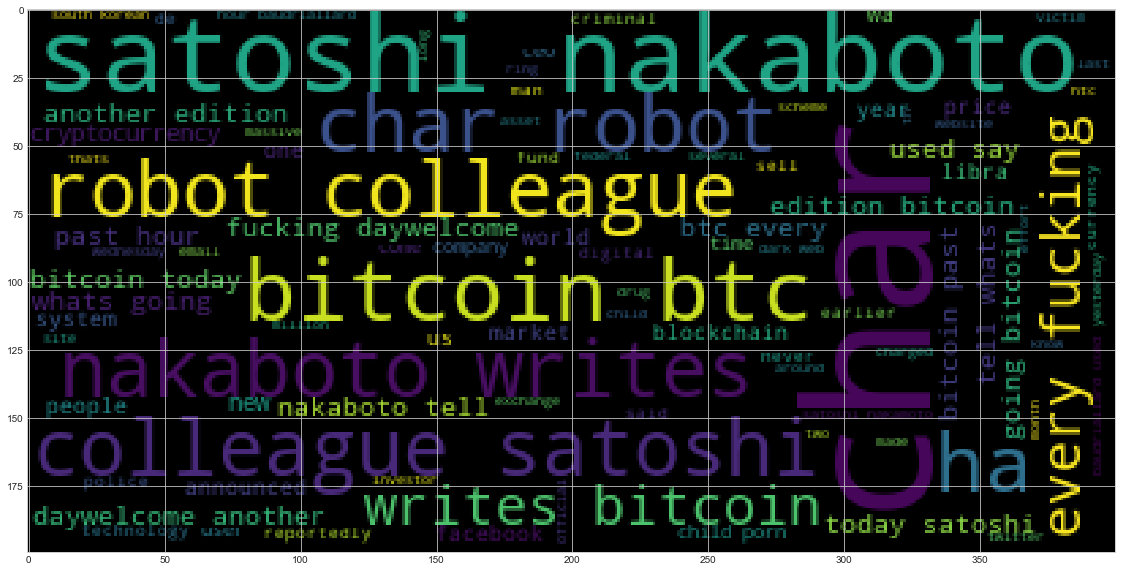

In [87]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(blobberizer(bitcoin_df))
plt.imshow(btc_wc)

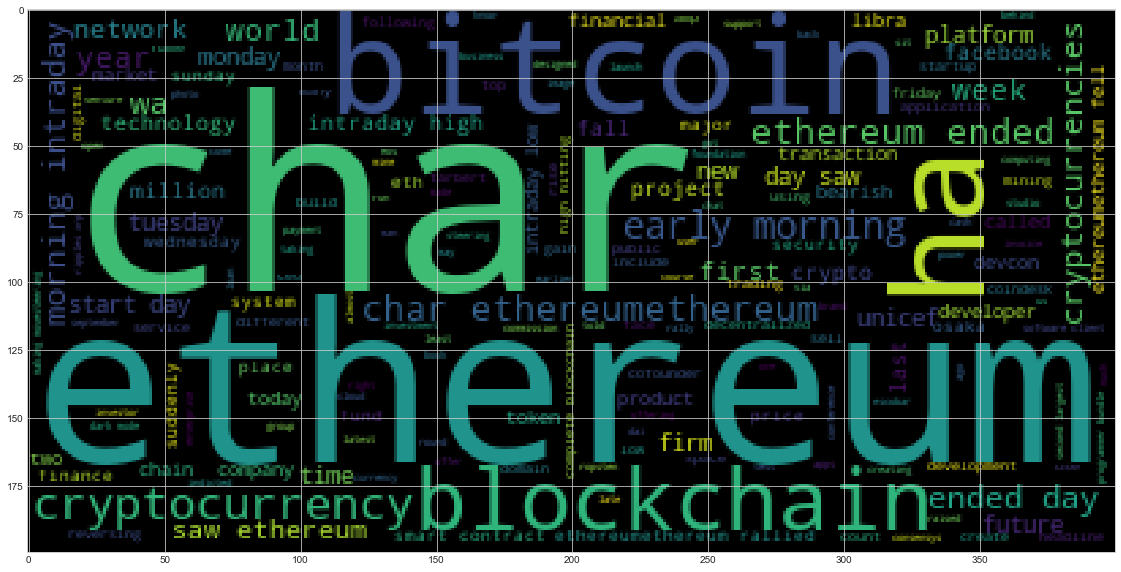

In [91]:
# Generate the Ethereum word cloud
btc_wc = WordCloud().generate(blobberizer(ethereum_df))
plt.imshow(btc_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [92]:
import spacy
from spacy import displacy

In [93]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [94]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [32]:
# Render the visualization

In [33]:
# List all Entities

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text

# Add a title to the document

In [36]:
# Render the visualization

In [37]:
# List all Entities

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f